In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [32]:
import numpy as np

In [26]:
# Load data from CSV
df = pd.read_csv('orientation_data_modified.csv')

In [27]:
df.head()

,id,timestamp,roll,pitch,yaw
0,1,1713339252090,0.0,0.00000,0.000000
1,2,1713339252100,0.0,9.77631,0.812349
2,3,1713339252927,0.0,0.00000,0.000000
3,4,1713339252929,0.0,9.77631,0.812349
4,5,1713339252933,0.0,0.00000,0.000000


In [28]:
df.shape

(1635, 5)

In [29]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [30]:
# Calculate time differences between consecutive timestamps
df['time_diff'] = df['timestamp'].diff().dt.total_seconds()

# Fill missing values in time_diff column with 0 (for the first row)
df['time_diff'] = df['time_diff'].fillna(0)

   id                     timestamp  roll    pitch       yaw     time_diff
0   1 1970-01-01 00:28:33.339252090   0.0  0.00000  0.000000  0.000000e+00
1   2 1970-01-01 00:28:33.339252100   0.0  9.77631  0.812349  1.000000e-08
2   3 1970-01-01 00:28:33.339252927   0.0  0.00000  0.000000  8.270000e-07
3   4 1970-01-01 00:28:33.339252929   0.0  9.77631  0.812349  2.000000e-09
4   5 1970-01-01 00:28:33.339252933   0.0  0.00000  0.000000  4.000000e-09


In [64]:
# Print the updated DataFrame
print(df.head())

   id                     timestamp  roll    pitch       yaw     time_diff
0   1 1970-01-01 00:28:33.339252090   0.0  0.00000  0.000000  0.000000e+00
1   2 1970-01-01 00:28:33.339252100   0.0  9.77631  0.812349  1.000000e-08
2   3 1970-01-01 00:28:33.339252927   0.0  0.00000  0.000000  8.270000e-07
3   4 1970-01-01 00:28:33.339252929   0.0  9.77631  0.812349  2.000000e-09
4   5 1970-01-01 00:28:33.339252933   0.0  0.00000  0.000000  4.000000e-09


Mean Squared Error (MSE): 2.4958047151181386


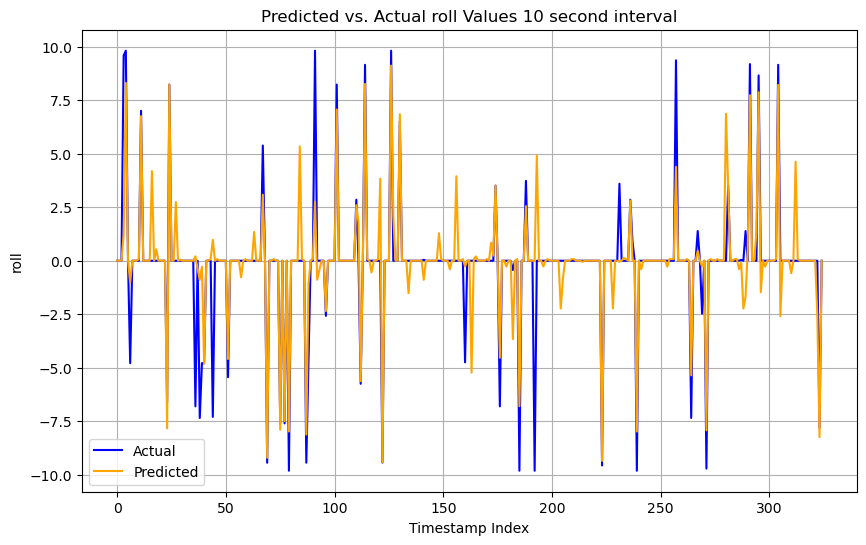

Mean Squared Error (MSE): 0.9957840736813035


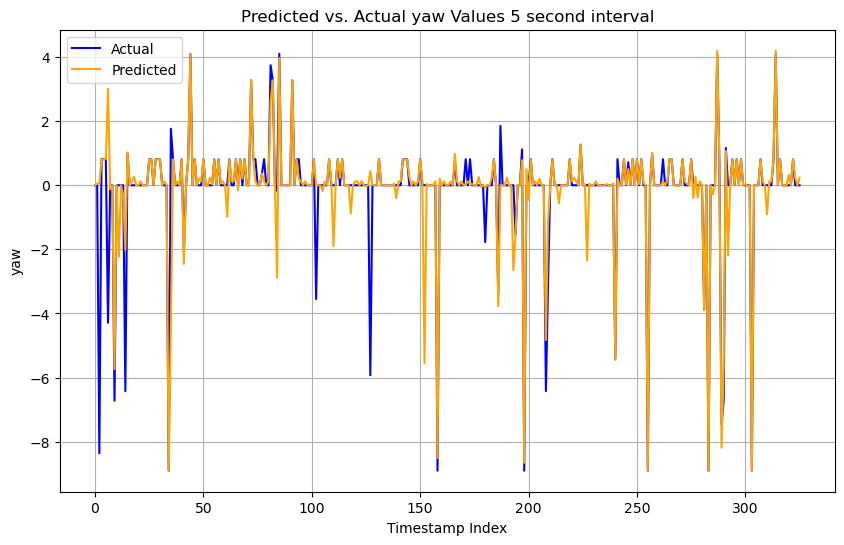

Mean Squared Error (MSE): 6.132504583680487


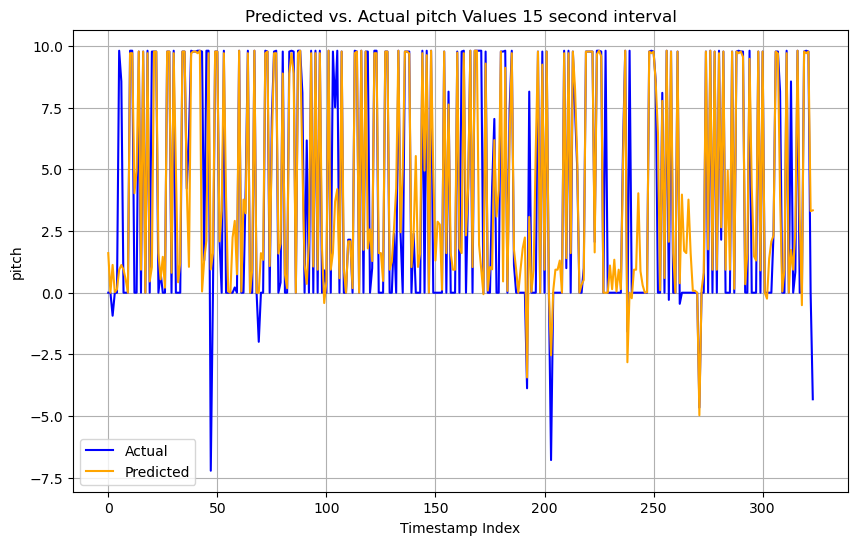

Mean Squared Error (MSE): 2.780506929182199


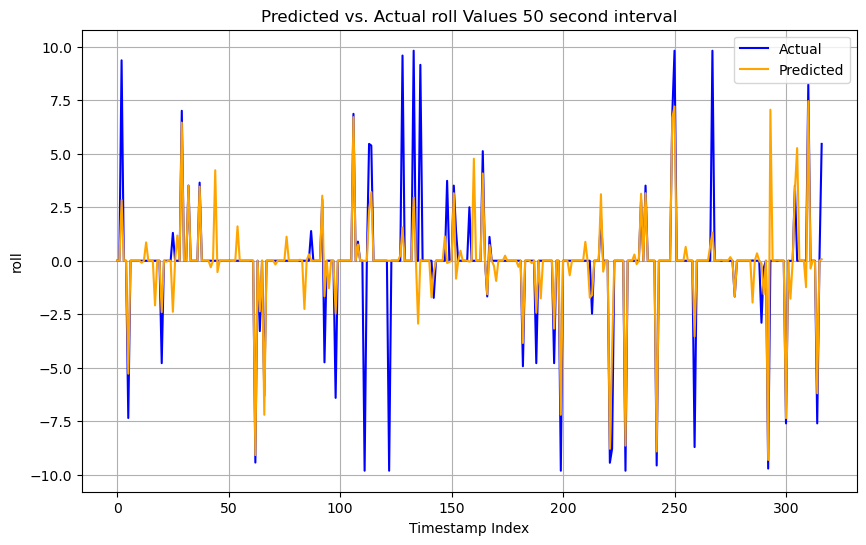

In [71]:
windows = [(10,'roll'), (5,'yaw'), (15,'pitch'), (50,'roll')]
for window_size in windows:
    X = []
    y = []
    for i in range(len(df) - window_size[0]):
        X.append(df.iloc[i:i+window_size[0]].drop(columns=['timestamp', 'id']).values)
        y.append(df.iloc[i+window_size[0]][window_size[1]])  # Adjust 'target_column' to your actual target column

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert lists to numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Reshape the training data to be two-dimensional
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    y_train_reshaped = y_train.reshape(-1)

    # Reshape the testing data similarly
    X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
    
    # Create RandomForestRegressor instance
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the regressor to the training data
    rf_regressor.fit(X_train_reshaped, y_train_reshaped)

    # Predict on the testing data
    y_pred = rf_regressor.predict(X_test_reshaped)
    
    # Calculate Mean Squared Error (MSE) to evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error (MSE):", mse)
    
    # Assuming y_new_actual contains the actual values for the new data
    # Plot the predicted vs. actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.title(f'Predicted vs. Actual {window_size[1]} Values {window_size[0]} second interval')
    plt.xlabel('Timestamp Index')
    plt.ylabel(f'{window_size[1]}')
    plt.legend()
    plt.grid(True)
    plt.show()